##Tugas Besar Pembelajaran Mesin Tahap 2

1. Nama : Achmad Salim Aiman<br>
   NIM  : 1301184045<br>
   <br>
2. Nama : Rifki Alfian Abdi Malik<br>
   NIM : 1301184197

## Import Library


In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from sklearn.preprocessing import LabelEncoder
import io
import requests

##Load Dataset

In [140]:
url1 = "https://raw.githubusercontent.com/salimaiman/datascience/main/salju_test.csv"
url2 = "https://raw.githubusercontent.com/rifkialfian/Tugas_Besar_ML_Classification/main/salju_train.csv"

data_test = pd.read_csv(url1)
data_train = pd.read_csv(url2)

In [141]:
data_train.head()

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,NaN,WSW,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,2,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,SW,WNW,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,3,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,SE,SE,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,4,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,N,SW,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,5,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,NNW,ESE,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak


In [142]:
data_test.head()

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,04/11/2010,C39,11.0,27.5,0.0,NaN,6.4,WSW,46.0,W,W,20.0,28.0,39.0,56.0,1013.0,1012.4,4.0,7.0,25.7,23.6,No,No
1,26/03/2015,C35,10.0,19.9,0.2,NaN,NaN,WNW,56.0,W,NW,24.0,33.0,76.0,32.0,1017.0,1015.2,8.0,1.0,10.7,18.9,No,Yes
2,22/03/2016,C18,9.2,27.2,0.0,5.2,10.4,SSW,33.0,NE,N,13.0,19.0,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,No,No
3,09/12/2011,C31,17.7,27.0,0.0,4.6,6.7,SW,35.0,E,SSE,20.0,15.0,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,No,No
4,20/05/2017,C14,2.3,7.9,88.0,NaN,NaN,NW,46.0,W,WNW,13.0,9.0,98.0,95.0,NaN,NaN,NaN,NaN,4.4,6.0,Yes,No


##Tahap Eksplorasi

###Dimensi

In [143]:
# Cek baris dan kolom data train
data_train.shape

(109095, 24)

In [144]:
# Cek baris dan kolom data test
data_test.shape

(18182, 23)

####Info Data

In [145]:
# Info data train
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109095 entries, 0 to 109094
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        109095 non-null  int64  
 1   Tanggal                   109095 non-null  object 
 2   KodeLokasi                109095 non-null  object 
 3   SuhuMin                   107973 non-null  float64
 4   SuhuMax                   108166 non-null  float64
 5   Hujan                     106664 non-null  float64
 6   Penguapan                 62071 non-null   float64
 7   SinarMatahari             56716 non-null   float64
 8   ArahAnginTerkencang       101351 non-null  object 
 9   KecepatanAnginTerkencang  101399 non-null  float64
 10  ArahAngin9am              101172 non-null  object 
 11  ArahAngin3pm              105898 non-null  object 
 12  KecepatanAngin9am         107742 non-null  float64
 13  KecepatanAngin3pm         106792 non-null  f

In [146]:
# Info data test
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tanggal                   18182 non-null  object 
 1   KodeLokasi                18182 non-null  object 
 2   SuhuMin                   18017 non-null  float64
 3   SuhuMax                   18017 non-null  float64
 4   Hujan                     17795 non-null  float64
 5   Penguapan                 10326 non-null  float64
 6   SinarMatahari             9464 non-null   float64
 7   ArahAnginTerkencang       16901 non-null  object 
 8   KecepatanAnginTerkencang  16908 non-null  float64
 9   ArahAngin9am              16874 non-null  object 
 10  ArahAngin3pm              17686 non-null  object 
 11  KecepatanAngin9am         17984 non-null  float64
 12  KecepatanAngin3pm         17828 non-null  float64
 13  Kelembaban9am             17852 non-null  float64
 14  Kelemb

###Analisa Kolom Target (BersaljuBesok)



###Cek Unique value

In [147]:
data_train['BersaljuBesok'].unique()

array(['Tidak', 'Ya', nan], dtype=object)

In [148]:
data_test['BersaljuBesok'].unique()

array(['No', 'Yes', nan], dtype=object)

Nilai pada data_train dan data_test tidak konsisten dan terdapat missing value. Oleh karena itu nilai kategorikal tersebut diubah menjadi bentuk numerical dan mengisi missing value dengan nilai modus.

####Mengatasi Missing Value

In [149]:
data_train['BersaljuBesok'].isnull().sum()

2431

In [150]:
data_train['BersaljuBesok'].fillna(data_train['BersaljuBesok'].mode()[0], inplace=True)
data_train['BersaljuBesok'].isnull().sum()

0

In [151]:
data_test['BersaljuBesok'].isnull().sum()

419

In [152]:
data_test['BersaljuBesok'].fillna(data_test['BersaljuBesok'].mode()[0], inplace=True)
data_test['BersaljuBesok'].isnull().sum()

0

####Mengatasi masalah pada unique value

In [153]:
data_train['BersaljuBesok'].replace({'Tidak': 0, 'Ya': 1},inplace = True)
data_test['BersaljuBesok'].replace({'No': 0, 'Yes': 1},inplace = True)

Nilai pada data_train dan data_test diubah menjadi angka 0 atau 1

In [154]:
data_train['BersaljuBesok'].unique()

array([0, 1])

In [155]:
data_test['BersaljuBesok'].unique()

array([0, 1])

##Preprocessing

###Missing Value

####Cek Missing Value

In [156]:
# Mengecek Missing Value
print("Check Missing Values in Data Train")
data_train.isnull().sum()

Check Missing Values in Data Train


id                              0
Tanggal                         0
KodeLokasi                      0
SuhuMin                      1122
SuhuMax                       929
Hujan                        2431
Penguapan                   47024
SinarMatahari               52379
ArahAnginTerkencang          7744
KecepatanAnginTerkencang     7696
ArahAngin9am                 7923
ArahAngin3pm                 3197
KecepatanAngin9am            1353
KecepatanAngin3pm            2303
Kelembaban9am                2002
Kelembaban3pm                3374
Tekanan9am                  11327
Tekanan3pm                  11308
Awan9am                     41844
Awan3pm                     44471
Suhu9am                      1340
Suhu3pm                      2698
BersaljuHariIni              2431
BersaljuBesok                   0
dtype: int64

In [157]:
# Mengecek Missing Value
print("Check Missing Values in Data test")
data_test.isnull().sum()

Check Missing Values in Data test


Tanggal                        0
KodeLokasi                     0
SuhuMin                      165
SuhuMax                      165
Hujan                        387
Penguapan                   7856
SinarMatahari               8718
ArahAnginTerkencang         1281
KecepatanAnginTerkencang    1274
ArahAngin9am                1308
ArahAngin3pm                 496
KecepatanAngin9am            198
KecepatanAngin3pm            354
Kelembaban9am                330
Kelembaban3pm                548
Tekanan9am                  1865
Tekanan3pm                  1853
Awan9am                     7042
Awan3pm                     7456
Suhu9am                      219
Suhu3pm                      442
BersaljuHariIni              387
BersaljuBesok                  0
dtype: int64

####Mengatasi missing value

Missing value pada kolom data numerik diisi dengan nilai mean. Dan pada kolom data kategorial diisi dengan nilai modus

In [158]:
data_train.fillna(data_train.mean(), inplace=True)               # Nilai Numerik
data_train = data_train.fillna(data_train.mode().iloc[0])        # Nilai Kategorikal
data_train.isnull().sum()

id                          0
Tanggal                     0
KodeLokasi                  0
SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
BersaljuBesok               0
dtype: int64

In [159]:
data_test.fillna(data_test.mean(), inplace=True)               # Nilai Numerik
data_test = data_test.fillna(data_test.mode().iloc[0])        # Nilai Kategorikal
data_test.isnull().sum()

Tanggal                     0
KodeLokasi                  0
SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
BersaljuBesok               0
dtype: int64

###Class Imbalance (BersaljuBesok)

Cek Distribusi

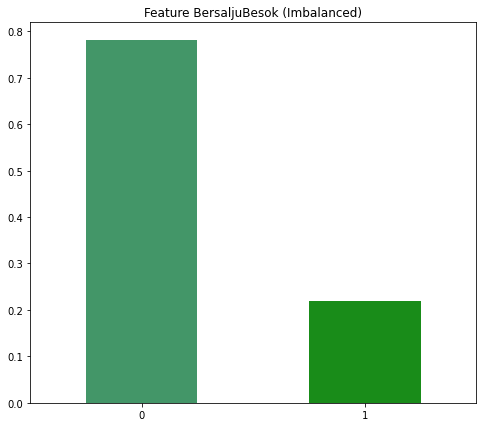

In [160]:
fig = plt.figure(figsize = (8,7))
data_train.BersaljuBesok.value_counts(normalize = True).plot(kind='bar', color= ['seagreen','green'], alpha = 0.9, rot=0)
plt.title('Feature BersaljuBesok (Imbalanced)')
plt.show()

Mengatasi Imbalance

In [161]:
from sklearn.utils import resample

tidak = data_train[data_train['BersaljuBesok'] == 0]
ya = data_train[data_train['BersaljuBesok'] == 1]

ya_oversample = resample(ya, replace=True, n_samples=len(tidak), random_state=123)
oversample = pd.concat([tidak, ya_oversample])

Cek Hasil

In [162]:
# Mengecek jumlah data pada kolom "Bersalju Besok"
data_train['BersaljuBesok'].value_counts()

0    85132
1    23963
Name: BersaljuBesok, dtype: int64

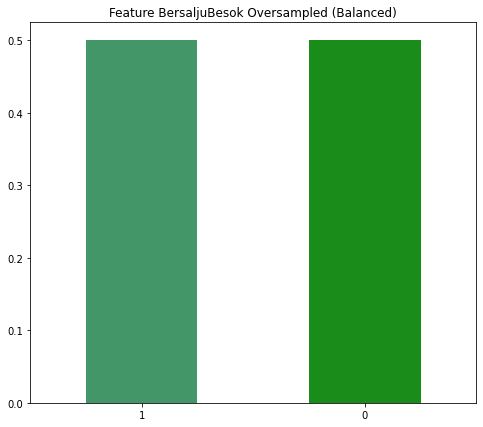

In [163]:
fig = plt.figure(figsize = (8,7))
oversample['BersaljuBesok'].value_counts(normalize = True).plot(kind='bar', color= ['seagreen','green'], alpha = 0.9, rot=0)
plt.title('Feature BersaljuBesok Oversampled (Balanced)')
plt.show()

###Drop Features

####Drop Features

Drop feature Id dan Tanggal

In [164]:
# Data Train

# Drop feature id
data_train = data_train.drop(columns=['id'])

# Drop feature Tanggal
data_train = data_train.drop(columns=['Tanggal'])

data_train.head()

,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,C4,10.4,15.5,4.8,5.46244,7.599527,WSW,24.000000,N,WSW,0.0,13.0,78.0,76.0,1020.10000,1018.500000,4.450893,4.51614,13.1,15.0,Ya,0
1,C10,9.0,17.0,8.0,2.60000,7.400000,W,40.032002,SW,WNW,13.0,20.0,80.0,61.0,1015.20000,1014.600000,7.000000,5.00000,11.9,15.5,Ya,1
2,C46,18.2,32.0,0.0,5.46244,7.599527,ESE,44.000000,SE,SE,15.0,26.0,62.0,42.0,1017.64708,1015.253117,4.450893,4.51614,23.8,29.6,Tidak,0
3,C36,7.3,24.5,0.0,8.40000,10.400000,SSW,54.000000,N,SW,13.0,19.0,25.0,17.0,1019.20000,1016.900000,1.000000,7.00000,15.3,23.2,Tidak,0
4,C7,5.9,20.3,0.0,3.60000,12.600000,N,37.000000,NNW,ESE,22.0,19.0,55.0,48.0,1019.70000,1014.700000,2.000000,6.00000,12.4,18.1,Tidak,0


In [165]:
# Data test

# Drop feature Tanggal
data_test = data_test.drop(columns=['Tanggal'])

data_test.head()

,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,C39,11.0,27.5,0.0,5.509646,6.400000,WSW,46.0,W,W,20.0,28.0,39.0,56.0,1013.00000,1012.400000,4.00000,7.000000,25.7,23.6,No,0
1,C35,10.0,19.9,0.2,5.509646,7.630135,WNW,56.0,W,NW,24.0,33.0,76.0,32.0,1017.00000,1015.200000,8.00000,1.000000,10.7,18.9,No,1
2,C18,9.2,27.2,0.0,5.200000,10.400000,SSW,33.0,NE,N,13.0,19.0,89.0,27.0,1018.60000,1015.700000,0.00000,1.000000,13.9,26.3,No,0
3,C31,17.7,27.0,0.0,4.600000,6.700000,SW,35.0,E,SSE,20.0,15.0,55.0,41.0,1010.20000,1008.600000,7.00000,6.000000,22.3,26.4,No,0
4,C14,2.3,7.9,88.0,5.509646,7.630135,NW,46.0,W,WNW,13.0,9.0,98.0,95.0,1017.56166,1015.181064,4.44982,4.498322,4.4,6.0,Yes,0


###Encode Data

Mengubah data categorical menjadi data numerical

In [166]:
# Merubah semua data categorical menjadi numerical di data train salju
labelencoder = LabelEncoder()
data_train['KodeLokasi'] = labelencoder.fit_transform(data_train['KodeLokasi'])
data_train['ArahAnginTerkencang'] = labelencoder.fit_transform(data_train['ArahAnginTerkencang'])
data_train['ArahAngin9am'] = labelencoder.fit_transform(data_train['ArahAngin9am'])
data_train['ArahAngin3pm'] = labelencoder.fit_transform(data_train['ArahAngin3pm'])
data_train['BersaljuHariIni'] = labelencoder.fit_transform(data_train['BersaljuHariIni'])


In [167]:
# Merubah semua data categorical menjadi numerical di data test salju
data_test['KodeLokasi'] = labelencoder.fit_transform(data_test['KodeLokasi'])
data_test['ArahAnginTerkencang'] = labelencoder.fit_transform(data_test['ArahAnginTerkencang'])
data_test['ArahAngin9am'] = labelencoder.fit_transform(data_test['ArahAngin9am'])
data_test['ArahAngin3pm'] = labelencoder.fit_transform(data_test['ArahAngin3pm'])
data_test['BersaljuHariIni'] = labelencoder.fit_transform(data_test['BersaljuHariIni'])

In [168]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   KodeLokasi                18182 non-null  int64  
 1   SuhuMin                   18182 non-null  float64
 2   SuhuMax                   18182 non-null  float64
 3   Hujan                     18182 non-null  float64
 4   Penguapan                 18182 non-null  float64
 5   SinarMatahari             18182 non-null  float64
 6   ArahAnginTerkencang       18182 non-null  int64  
 7   KecepatanAnginTerkencang  18182 non-null  float64
 8   ArahAngin9am              18182 non-null  int64  
 9   ArahAngin3pm              18182 non-null  int64  
 10  KecepatanAngin9am         18182 non-null  float64
 11  KecepatanAngin3pm         18182 non-null  float64
 12  Kelembaban9am             18182 non-null  float64
 13  Kelembaban3pm             18182 non-null  float64
 14  Tekana

###Outliers

####Data Train

In [169]:
data_train.describe()

,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
count,109095.000000,109095.000000,109095.000000,109095.000000,109095.000000,109095.000000,109095.000000,109095.000000,109095.000000,109095.000000,109095.000000,109095.000000,109095.000000,109095.000000,109095.000000,109095.000000,109095.000000,109095.000000,109095.000000,109095.000000,109095.000000,109095.000000
mean,23.467657,12.196183,23.214819,2.385005,5.462440,7.599527,8.095146,40.032002,7.000642,7.799404,14.052115,18.677579,68.895577,51.567626,1017.647080,1015.253117,4.450893,4.516140,16.991391,21.672771,0.219937,0.219653
std,14.082341,6.356477,7.076273,8.491928,3.169269,2.731983,4.694516,13.128447,4.514716,4.534291,8.870568,8.736498,18.820426,20.467533,6.737726,6.672616,2.264781,2.092476,6.437697,6.836693,0.414205,0.414013
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000
25%,11.000000,7.700000,18.000000,0.000000,4.000000,7.599527,4.000000,31.000000,3.000000,4.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.400000,16.700000,0.000000,0.000000
50%,23.000000,12.100000,22.700000,0.000000,5.462440,7.599527,9.000000,39.000000,7.000000,8.000000,13.000000,18.677579,69.000000,51.567626,1017.647080,1015.253117,4.450893,4.516140,16.800000,21.400000,0.000000,0.000000
75%,35.000000,16.800000,28.200000,1.000000,5.462440,8.700000,13.000000,46.000000,11.000000,12.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000,0.000000,0.000000
max,48.000000,33.900000,47.300000,371.000000,145.000000,14.300000,15.000000,135.000000,15.000000,15.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000,1.000000


Dari hasil describe data di atas dapat dilihat bahwa feature yang memiliki outlier adalah: **Hujan**, **Penguapan**, **KecepatanAngin9am**, dan **KecepatanAngin3pm**

In [170]:
feature_outlier = ['Hujan', 'Penguapan', 'KecepatanAngin9am', 'KecepatanAngin3pm']

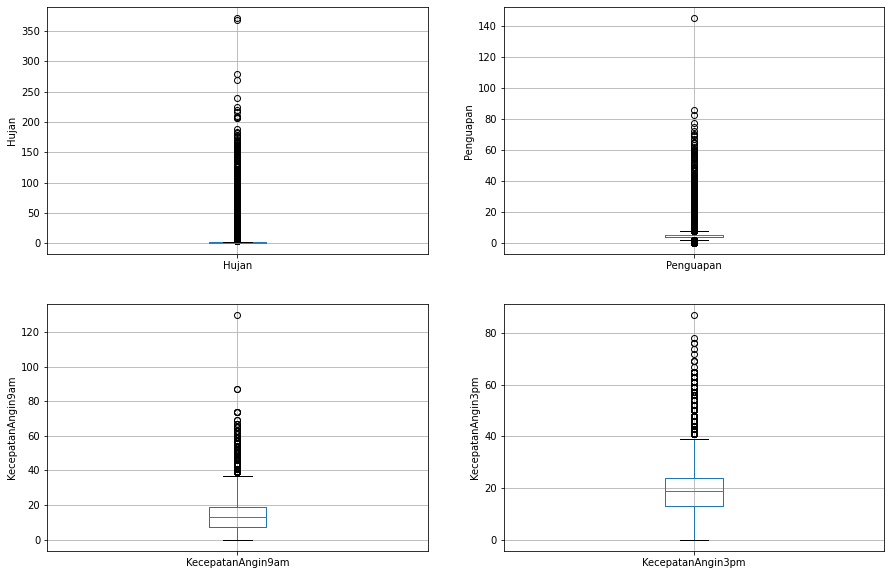

In [171]:
plt.figure(figsize=(15,10))

for i in range(len(feature_outlier)):
    plt.subplot(2, 2, i+1)
    fig = data_train.boxplot(column=feature_outlier[i])
    fig.set_title('')
    fig.set_ylabel(feature_outlier[i])

Mengatasi Ouliers

In [172]:
for feature in feature_outlier:
    Q1 = data_train[feature].quantile(0.25)
    Q3 = data_train[feature].quantile(0.75)
    
    IQR = Q3 - Q1
    Low_fence = Q1 - (IQR * 3)
    Up_fence = Q3 + (IQR * 3)
    print('Nilai outliers feature {column} adalah < {lowerboundary} dan > {upperboundary}'.format(column=feature, lowerboundary=Low_fence, upperboundary=Up_fence))


    # Handle Outlier
    data_train[feature] = np.where(data_train[feature]>Up_fence, Up_fence, data_train[feature])
    data_train[feature] = np.where(data_train[feature]<Low_fence, Low_fence, data_train[feature])

Nilai outliers feature Hujan adalah < -3.0 dan > 4.0
Nilai outliers feature Penguapan adalah < -0.3873193600875009 dan > 9.849759146783335
Nilai outliers feature KecepatanAngin9am adalah < -29.0 dan > 55.0
Nilai outliers feature KecepatanAngin3pm adalah < -20.0 dan > 57.0


Hasil

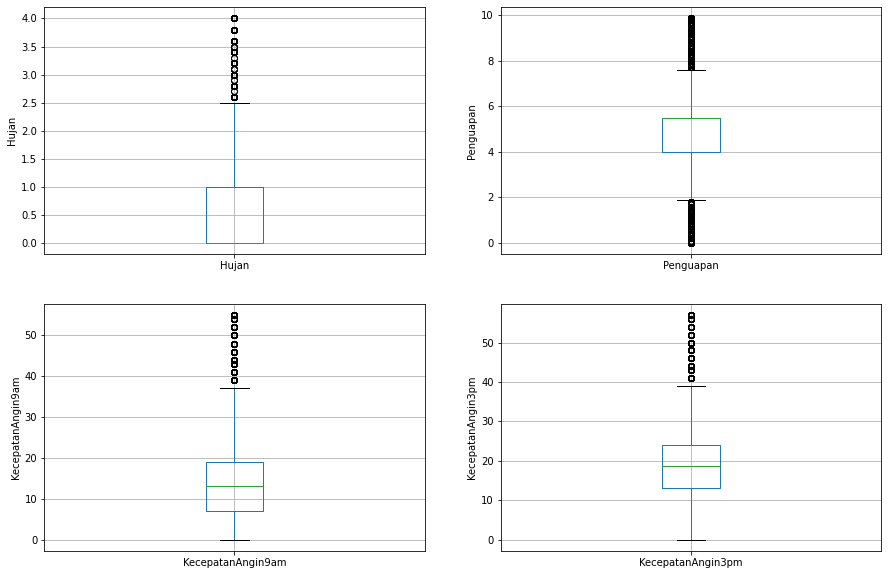

In [173]:
plt.figure(figsize=(15,10))

for i in range(len(feature_outlier)):
    plt.subplot(2, 2, i+1)
    fig = data_train.boxplot(column=feature_outlier[i])
    fig.set_title('')
    fig.set_ylabel(feature_outlier[i])


In [174]:
data_train.describe()

,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
count,109095.000000,109095.000000,109095.000000,109095.000000,109095.000000,109095.000000,109095.000000,109095.000000,109095.000000,109095.000000,109095.000000,109095.000000,109095.000000,109095.000000,109095.000000,109095.000000,109095.000000,109095.000000,109095.000000,109095.000000,109095.000000,109095.000000
mean,23.467657,12.196183,23.214819,0.835947,5.225621,7.599527,8.095146,40.032002,7.000642,7.799404,14.047413,18.674031,68.895577,51.567626,1017.647080,1015.253117,4.450893,4.516140,16.991391,21.672771,0.219937,0.219653
std,14.082341,6.356477,7.076273,1.439662,2.172038,2.731983,4.694516,13.128447,4.514716,4.534291,8.842973,8.718595,18.820426,20.467533,6.737726,6.672616,2.264781,2.092476,6.437697,6.836693,0.414205,0.414013
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000
25%,11.000000,7.700000,18.000000,0.000000,4.000000,7.599527,4.000000,31.000000,3.000000,4.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.400000,16.700000,0.000000,0.000000
50%,23.000000,12.100000,22.700000,0.000000,5.462440,7.599527,9.000000,39.000000,7.000000,8.000000,13.000000,18.677579,69.000000,51.567626,1017.647080,1015.253117,4.450893,4.516140,16.800000,21.400000,0.000000,0.000000
75%,35.000000,16.800000,28.200000,1.000000,5.462440,8.700000,13.000000,46.000000,11.000000,12.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000,0.000000,0.000000
max,48.000000,33.900000,47.300000,4.000000,9.849759,14.300000,15.000000,135.000000,15.000000,15.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000,1.000000


####Data Test

In [175]:
data_test.describe()

,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
count,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000
mean,23.335332,12.233158,23.295604,2.333560,5.509646,7.630135,7.886206,39.974095,6.985260,7.805797,13.971864,18.585540,68.791676,51.438811,1017.561660,1015.181064,4.449820,4.498322,17.048945,21.774408,0.218073,0.216643
std,14.073773,6.403795,7.124431,8.231377,3.134307,2.738876,4.531075,13.010395,4.508101,4.542106,8.780218,8.662996,18.983937,20.483376,6.770781,6.702552,2.262647,2.093117,6.485141,6.892750,0.412948,0.411969
min,0.000000,-7.600000,-2.500000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,982.300000,984.500000,0.000000,0.000000,-5.200000,-3.700000,0.000000,0.000000
25%,11.000000,7.700000,18.000000,0.000000,4.200000,7.630135,4.000000,31.000000,3.000000,4.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1010.900000,3.000000,4.000000,12.400000,16.800000,0.000000,0.000000
50%,23.000000,12.100000,22.800000,0.000000,5.509646,7.630135,9.000000,39.000000,7.000000,8.000000,13.000000,18.585540,69.000000,51.438811,1017.561660,1015.181064,4.449820,4.498322,16.900000,21.400000,0.000000,0.000000
75%,35.000000,16.900000,28.300000,1.000000,5.509646,8.700000,11.000000,46.000000,11.000000,12.000000,19.000000,24.000000,83.000000,65.000000,1021.700000,1019.300000,6.000000,6.000000,21.600000,26.400000,0.000000,0.000000
max,48.000000,31.400000,48.100000,247.200000,68.800000,14.500000,15.000000,122.000000,15.000000,15.000000,83.000000,83.000000,100.000000,100.000000,1040.600000,1038.400000,8.000000,8.000000,37.700000,46.100000,1.000000,1.000000


Dari hasil describe data test di atas, juga terdapat hasil yang sama dengan data train yaitu bahwa feature yang memiliki outlier adalah: **Hujan**, **Penguapan**, **KecepatanAnginTerkencang**, **KecepatanAngin9am**, dan **KecepatanAngin3pm**

In [176]:
feature_outlier_test = ['Hujan', 'Penguapan', 'KecepatanAngin9am', 'KecepatanAngin3pm']

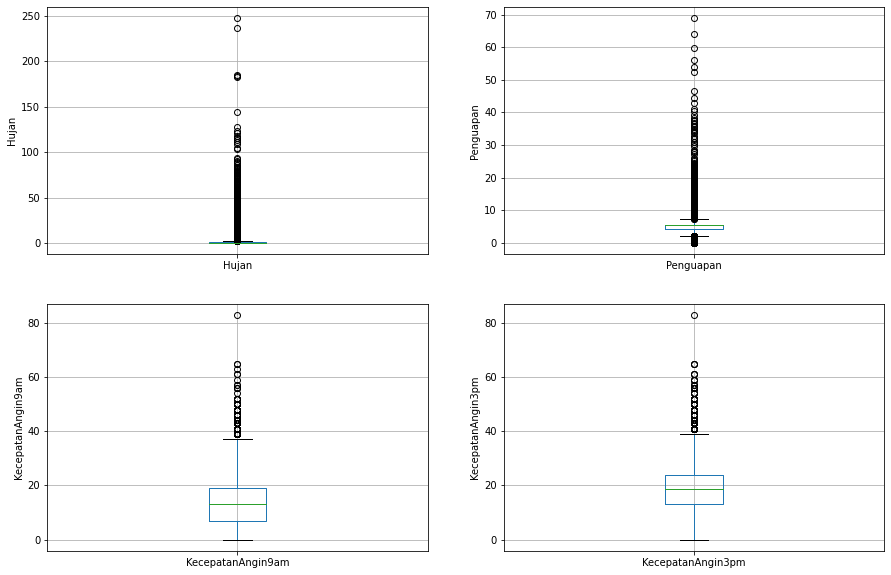

In [177]:
plt.figure(figsize=(15,10))

for i in range(len(feature_outlier_test)):
    plt.subplot(2, 2, i+1)
    fig = data_test.boxplot(column=feature_outlier_test[i])
    fig.set_title('')
    fig.set_ylabel(feature_outlier_test[i])

Mengatasi Outliers

In [178]:
for feature in feature_outlier_test:
    Q1 = data_test[feature].quantile(0.25)
    Q3 = data_test[feature].quantile(0.75)
    
    IQR = Q3 - Q1
    Low_fence = Q1 - (IQR * 3)
    Up_fence = Q3 + (IQR * 3)
    print('Nilai outliers feature {column} adalah < {lowerboundary} dan > {upperboundary}'.format(column=feature, lowerboundary=Low_fence, upperboundary=Up_fence))


    # Handle Outlier
    data_test[feature] = np.where(data_test[feature]>Up_fence, Up_fence, data_test[feature])
    data_test[feature] = np.where(data_test[feature]<Low_fence, Low_fence, data_test[feature])

Nilai outliers feature Hujan adalah < -3.0 dan > 4.0
Nilai outliers feature Penguapan adalah < 0.2710633352702443 dan > 9.438582219639674
Nilai outliers feature KecepatanAngin9am adalah < -29.0 dan > 55.0
Nilai outliers feature KecepatanAngin3pm adalah < -20.0 dan > 57.0


Hasil

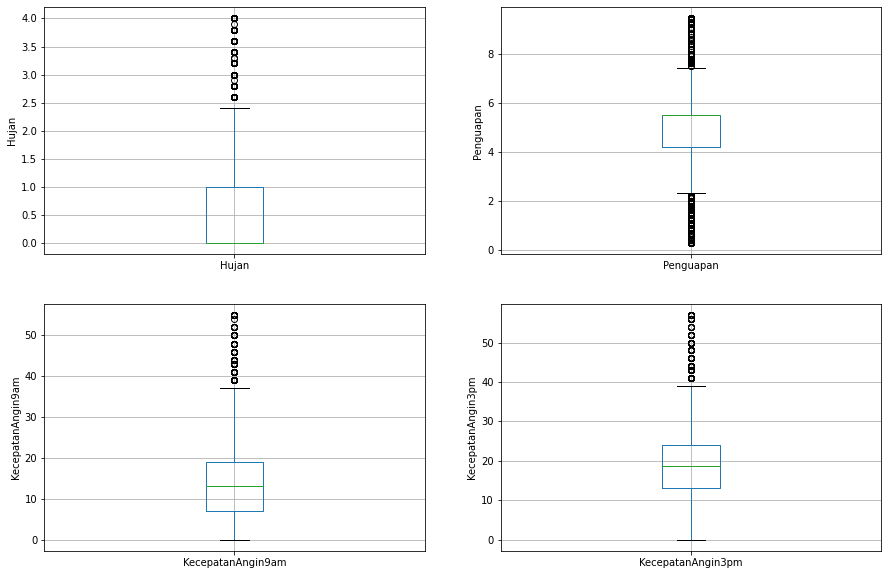

In [179]:
plt.figure(figsize=(15,10))

for i in range(len(feature_outlier_test)):
    plt.subplot(2, 2, i+1)
    fig = data_test.boxplot(column=feature_outlier_test[i])
    fig.set_title('')
    fig.set_ylabel(feature_outlier_test[i])

In [180]:
data_test.describe()

,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
count,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.00000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000
mean,23.335332,12.233158,23.295604,0.819167,5.244918,7.630135,7.886206,39.974095,6.985260,7.805797,13.967519,18.58169,68.791676,51.438811,1017.561660,1015.181064,4.449820,4.498322,17.048945,21.774408,0.218073,0.216643
std,14.073773,6.403795,7.124431,1.426427,2.114759,2.738876,4.531075,13.010395,4.508101,4.542106,8.756287,8.64294,18.983937,20.483376,6.770781,6.702552,2.262647,2.093117,6.485141,6.892750,0.412948,0.411969
min,0.000000,-7.600000,-2.500000,0.000000,0.271063,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.00000,2.000000,1.000000,982.300000,984.500000,0.000000,0.000000,-5.200000,-3.700000,0.000000,0.000000
25%,11.000000,7.700000,18.000000,0.000000,4.200000,7.630135,4.000000,31.000000,3.000000,4.000000,7.000000,13.00000,57.000000,37.000000,1013.500000,1010.900000,3.000000,4.000000,12.400000,16.800000,0.000000,0.000000
50%,23.000000,12.100000,22.800000,0.000000,5.509646,7.630135,9.000000,39.000000,7.000000,8.000000,13.000000,18.58554,69.000000,51.438811,1017.561660,1015.181064,4.449820,4.498322,16.900000,21.400000,0.000000,0.000000
75%,35.000000,16.900000,28.300000,1.000000,5.509646,8.700000,11.000000,46.000000,11.000000,12.000000,19.000000,24.00000,83.000000,65.000000,1021.700000,1019.300000,6.000000,6.000000,21.600000,26.400000,0.000000,0.000000
max,48.000000,31.400000,48.100000,4.000000,9.438582,14.500000,15.000000,122.000000,15.000000,15.000000,55.000000,57.00000,100.000000,100.000000,1040.600000,1038.400000,8.000000,8.000000,37.700000,46.100000,1.000000,1.000000


###Scaling

Scaling pada feature menggunakan metode Min Max Scaling

In [181]:
# Scaling pada data train
data_train = (data_train - data_train.min()) / (data_train.max() - data_train.min())
data_train.head(5)

,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,0.687500,0.445755,0.389635,1.0,0.554576,0.531435,1.000000,0.132812,0.2,1.000000,0.000000,0.228070,0.78,0.76,0.654545,0.66240,0.494544,0.501793,0.428270,0.391555,1.0,0.0
1,0.020833,0.412736,0.418426,1.0,0.263966,0.517483,0.866667,0.258063,0.8,0.933333,0.236364,0.350877,0.80,0.61,0.573554,0.60000,0.777778,0.555556,0.402954,0.401152,1.0,1.0
2,0.833333,0.629717,0.706334,0.0,0.554576,0.531435,0.133333,0.289062,0.6,0.600000,0.272727,0.456140,0.62,0.42,0.614001,0.61045,0.494544,0.501793,0.654008,0.671785,0.0,0.0
3,0.604167,0.372642,0.562380,0.0,0.852813,0.727273,0.733333,0.367188,0.2,0.800000,0.236364,0.333333,0.25,0.17,0.639669,0.63680,0.111111,0.777778,0.474684,0.548944,0.0,0.0
4,0.958333,0.339623,0.481766,0.0,0.365491,0.881119,0.200000,0.234375,0.4,0.133333,0.400000,0.333333,0.55,0.48,0.647934,0.60160,0.222222,0.666667,0.413502,0.451056,0.0,0.0


In [182]:
# Scaling pada data test
data_test = (data_test - data_test.min()) / (data_test.max() - data_test.min())
data_test.head(5)

,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,0.666667,0.476923,0.592885,0.00,0.571429,0.441379,1.000000,0.344828,0.866667,0.866667,0.363636,0.491228,0.377551,0.555556,0.526587,0.517625,0.500000,0.87500,0.720280,0.548193,0.0,0.0
1,0.583333,0.451282,0.442688,0.05,0.571429,0.526216,0.933333,0.431034,0.866667,0.466667,0.436364,0.578947,0.755102,0.313131,0.595197,0.569573,1.000000,0.12500,0.370629,0.453815,0.0,1.0
2,0.187500,0.430769,0.586957,0.00,0.537652,0.717241,0.733333,0.232759,0.266667,0.200000,0.236364,0.333333,0.887755,0.262626,0.622642,0.578850,0.000000,0.12500,0.445221,0.602410,0.0,0.0
3,0.500000,0.648718,0.583004,0.00,0.472204,0.462069,0.800000,0.250000,0.000000,0.666667,0.363636,0.263158,0.540816,0.404040,0.478559,0.447124,0.875000,0.75000,0.641026,0.604418,0.0,0.0
4,0.104167,0.253846,0.205534,1.00,0.571429,0.526216,0.466667,0.344828,0.866667,0.933333,0.236364,0.157895,0.979592,0.949495,0.604831,0.569222,0.556228,0.56229,0.223776,0.194779,1.0,0.0


#Testing

In [183]:
X_train = data_train.drop(['BersaljuBesok'], axis=1)
y_train = data_train['BersaljuBesok'].copy()

In [184]:
X_test = data_test.drop(['BersaljuBesok'], axis=1)
y_test = data_test['BersaljuBesok'].copy()

In [185]:
def confusion_metrics (y_test,y_pred):
    #Showing Confusion Matrix to know True Positive, False Positive, True Negative and False Negative
    from sklearn import metrics
    cm = metrics.confusion_matrix(y_test, y_pred)

    cm_df = pd.DataFrame(cm, 
                         columns = ['Predicted Negative', 'Predicted Positive'], 
                         index = ['Actual Negative', 'Actual Positive'])

    #Assign True Positive, False Positive, True Negative and False Negative intu variable
    TN = cm_df.loc['Actual Negative','Predicted Negative']
    FN = cm_df.loc['Actual Positive','Predicted Negative']
    FP = cm_df.loc['Actual Negative','Predicted Positive']
    TP = cm_df.loc['Actual Positive','Predicted Positive']
    
    # Calculate Accuracy, Precission, Recall and F1 Score
    accuracy = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0])
    precision = (cm[0,0])/(cm[0,0]+cm[0,1])
    recall = (cm[0,0])/(cm[0,0]+cm[1,0])
    f1_score = 2*((precision*recall)/(precision+recall))

    print('True Negative  : ',TN)
    print('False Negative : ',FN)
    print('False Positive : ',FP)
    print('True Positive  : ',TP)
    print('')
    print('')

    print('Accuracy = ', accuracy)
    print('')
    print('Precision = ', precision)
    print('')
    print('Recall = ', recall)
    print('')
    print('F1 Score = ', f1_score)
    print('')
    print('')


##K-Nearest Neighbors

In [186]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [187]:
y_pred_train = knn.predict(X_train)

In [188]:
y_pred_test = knn.predict(X_test)

####Evaluasi

In [189]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.8772
Test set score: 0.8318


In [190]:
confusion_metrics(y_test, y_pred_test)

True Negative  :  13119
False Negative :  1934
False Positive :  1124
True Positive  :  2005


Accuracy =  0.8318116818831812

Precision =  0.9210840412834375

Recall =  0.8715206271175181

F1 Score =  0.895617149098853




##Naive Bayes

In [191]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB().fit(X_train, y_train)
naive.class_count_

array([85132., 23963.])

In [192]:
y_pred_train = naive.predict(X_train)

In [193]:
y_pred_test = naive.predict(X_test)

####Evaluasi

In [194]:
print('Training set score: {:.4f}'.format(naive.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(naive.score(X_test, y_test)))

Training set score: 0.7847
Test set score: 0.7660


In [195]:
confusion_metrics(y_test, y_pred_test)

True Negative  :  11165
False Negative :  1177
False Positive :  3078
True Positive  :  2762


Accuracy =  0.7659773402265977

Precision =  0.7838938425893421

Recall =  0.9046345811051694

F1 Score =  0.8399473387248448




##Decision Tree

In [196]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [197]:
y_pred_train = decision.predict(X_train)

In [198]:
y_pred_test = decision.predict(X_test)

####Evaluasi

In [199]:
print('Training set score: {:.4f}'.format(decision.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(decision.score(X_test, y_test)))

Training set score: 0.9999
Test set score: 0.7126


In [200]:
confusion_metrics(y_test, y_pred_test)

True Negative  :  10571
False Negative :  1553
False Positive :  3672
True Positive  :  2386


Accuracy =  0.7126278737212628

Precision =  0.7421891455451801

Recall =  0.8719069613988782

F1 Score =  0.8018356278681685




##Random Forest

In [201]:
from sklearn.ensemble import RandomForestClassifier

rand = RandomForestClassifier()      
rand.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [202]:
y_pred_train = rand.predict(X_train)

In [203]:
y_pred_test = rand.predict(X_test)

####Evaluasi

In [204]:
print('Training set score: {:.4f}'.format(rand.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(rand.score(X_test, y_test)))

Training set score: 0.9999
Test set score: 0.8525


In [205]:
confusion_metrics(y_test, y_pred_test)

True Negative  :  13199
False Negative :  1638
False Positive :  1044
True Positive  :  2301


Accuracy =  0.8524914750852491

Precision =  0.9267008354981394

Recall =  0.8896003235155355

F1 Score =  0.9077716643741404




#KESIMPULAN

Dari ke-4 algoritma di atas dapat kita ketahui bahwa algoritma yang paling optimal dalam melakukan klasifikasi adalah **Random Forest**.